# Algorithmic Trading Strategy using Bollinger Bands and Stochastic RSI:

#### Author: Bryson Byrd 
#### Last edited: November 16, 2022

## Introduction:

   Data analytics is a useful tool when it comes to trading financial assets. Backtesting tradings strategies using historical data is a good way to evaluate profitiblilty without risking real money. For this strategy, I will be utilizing two well-known technical indicators, the Bollinger Bands and the Stochastic RSI. I chose these two indicators because they are quite versatile. They work well with lots of different time intervals and resolutions, so they can be tailored toward a trading niche (intraday, swing trading, or longer term). We will also be utilizing the Binance API. Crypto markets are open 24/7, and are quite volatile, making it an excellent place to perform quantitative trading strategies.

### Program Logic:
Sometimes I want to lay out my strategy before I begin to write the code. It helps me stay organized.

#### INPUTS:
Live market data provided by the Binance API

Open, Close, High, Low, Volume

Open trades

Which Cryptocurrency to trade

#### CALCULATIONS:

Technical indicators that are related to a specific trading strategy

Buying conditions

Selling conditions

#### OUTPUTS:
Profitiblity of strategy for given Cryptocurrency


## Code:

In [1]:
#import the modules we need
import pandas as pd
import ta
import matplotlib.pyplot as plt
from binance.client import Client

In [2]:
#My api keys. You can define the api keys as variables in the script, but this is for security measures. 
%run ./Binance_keys.ipynb

In [3]:
#The Binance client that will provide the historical data. 
client = Client(api_key, api_secret, tld = 'us')

In [4]:
#You can play around with these parameters to fine tune this strategy for different coins and for different price actions.
symbol = 'BTCUSDT'
res = '1m'
interval = '12 hours ago UTC'


#This function formats the financial data provided by the Binance api. 
def getdata(symbol,res,inteval):
    frame = pd.DataFrame(client.get_historical_klines(symbol,
                                                     res,
                                                     interval))
    frame = frame.iloc[:,0:5]
    frame.columns = ['Time','Open','High','Low','Close']
    frame.set_index('Time', inplace = True)
    frame.index = pd.to_datetime(frame.index, unit = 'ms')
    frame = frame.astype(float)
    return frame

In [5]:
#We will get the financial data for Bitcoin for the time interval specified above.
bitcoin = getdata(symbol,res,interval)
bitcoin

,Open,High,Low,Close
Time,,,,
2022-11-16 10:55:00,16714.89,16714.89,16710.59,16714.14
2022-11-16 10:56:00,16714.14,16714.14,16714.14,16714.14
2022-11-16 10:57:00,16711.40,16723.37,16711.40,16717.91
2022-11-16 10:58:00,16718.46,16729.23,16718.46,16722.44
2022-11-16 10:59:00,16722.59,16731.23,16722.59,16731.23
...,...,...,...,...
2022-11-16 22:50:00,16561.15,16564.74,16561.15,16564.74
2022-11-16 22:51:00,16567.81,16567.81,16561.68,16561.68
2022-11-16 22:52:00,16559.18,16574.86,16559.18,16574.86


In [6]:
#This function calculated the technical indicators necessary for the trading strategy. 
# Bollinger Bands help to determine whether prices are too high or too low on a relative basis
# if standard deviation is low, it raises the likelihood of a sharp price move either direction
# if standard deviation is high, the existing trend may be ending
# Prices tend to move from band to band
# Stochastic RSI is a momentum indicators that helps determine if a given move is likely to continue. 
# Paired with the Bollinger Bands, we can come up with a simple trading strategy.
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html for more info about the ta module
def indicators(df):
    BB = ta.volatility.BollingerBands(df.Close, window = 15, window_dev = 2 )
    df['SMA_20'] = ta.trend.sma_indicator(df.Close, window = 20)
    df['High_BB'] = BB.bollinger_hband()
    df['Low_BB'] = BB.bollinger_lband()
    df['HighPass'] = BB.bollinger_hband_indicator()
    df['LowPass'] = BB.bollinger_lband_indicator()
    df['StochRSI'] = ta.momentum.stochrsi(df.Close, window = 15, smooth1 = 12, smooth2=8)
    df['shifted_open'] = df.Open.shift(-1)
    df = df.dropna()
    return df

In [7]:
#We will calculate the technical indicators from above for Bitcoin.
btc = indicators(bitcoin)
btc

,Open,High,Low,Close,SMA_20,High_BB,Low_BB,HighPass,LowPass,StochRSI,shifted_open
Time,,,,,,,,,,,
2022-11-16 11:23:00,16758.38,16759.97,16753.84,16755.27,16742.3395,16781.389716,16711.850284,0.0,0.0,0.456105,16752.96
2022-11-16 11:24:00,16752.96,16759.88,16748.25,16759.88,16742.7845,16780.763501,16718.297832,0.0,0.0,0.524966,16762.33
2022-11-16 11:25:00,16762.33,16762.33,16757.39,16759.49,16743.8450,16778.303897,16726.548103,0.0,0.0,0.222427,16758.76
2022-11-16 11:26:00,16758.76,16760.06,16758.76,16760.06,16745.7795,16777.473434,16731.439900,0.0,0.0,0.181913,16764.09
2022-11-16 11:27:00,16764.09,16768.12,16763.15,16763.15,16748.0395,16776.330579,16736.814754,0.0,0.0,0.222047,16760.57
...,...,...,...,...,...,...,...,...,...,...,...
2022-11-16 22:49:00,16553.14,16561.15,16553.00,16561.15,16536.3395,16555.488397,16524.787603,1.0,0.0,1.000000,16561.15
2022-11-16 22:50:00,16561.15,16564.74,16561.15,16564.74,16538.1140,16561.476639,16522.719361,1.0,0.0,1.000000,16567.81
2022-11-16 22:51:00,16567.81,16567.81,16561.68,16561.68,16540.0775,16565.201313,16522.060021,0.0,0.0,0.884545,16559.18


In [8]:
def strategy(df):
    
    #Initially not in a position
    in_position = False

    #record the time of each trade.
    #record the price of each trade.
    buytimes, selltimes = [],[]
    buyprices, sellprices = [],[]

    #loop through the dataframe to scan for trading signals.
    for index, row in df.iterrows():
    
        #Signal that we broke out of the Upper Bollinger Band.
        #May make a trade, depending on the momentum indicator.
        
        if row.HighPass:
            #End of an uptrend. 
            #If in a position, sell. 
            #If not in a position, dont buy.
        
            if row.StochRSI >= 0.80:
                if in_position:
                    sellprice = row.shifted_open
                    sellprices.append(sellprice)
                    selltimes.append(index)
                    in_position = False
                else:
                    continue

            #Start of an uptrend. 
            #If in a position, don't sell.
            #If not in position, buy.
        
            elif row.StochRSI <= 0.2:
                if in_position:
                    continue
                else:
                    buyprice = row.shifted_open
                    buyprices.append(buyprice)
                    buytimes.append(index)
                    in_position = True
        
        
            #No signal that we broke out of the Upper Bollinger Band.
        elif not row.HighPass:
        
            #Signal that we broke out of the Lower Bollinger Band.
            #May make a trade, depending on the momentum indicator.
        
            if row.LowPass:
            
                #Might be the start of a crash. 
                #If in a postition, sell.
                #If not in position, don't buy.
                if row.StochRSI >= 0.8:
                    if in_position:
                        sellprice = row.shifted_open
                        sellprices.append(sellprice)
                        selltimes.append(index)
                        in_position = False
            
            
                #Might be the end of a crash. 
                #If in a position, don't sell.
                #If not in a position, buy. 
            
                elif row.StochRSI <= 0.2:
                    if in_position:
                        continue
                    else:
                        buyprice = row.shifted_open
                        buyprices.append(buyprice)
                        buytimes.append(index)
                        in_position = True

    #Calculate the net profit margin for each individual trade
    profits = pd.Series([(sell - buy)/sell for sell,buy in zip(sellprices, buyprices)])

    netprofit = (profits + 1).prod()

    num_of_trades = len(sellprices)

    netprofitmargin = round((netprofit - 1),2) * 100

    print('Number of trades: ',num_of_trades)
    print('Net profit margin: ', netprofitmargin, '%.')

In [9]:
strategy(btc)

Number of trades:  9
Net profit margin:  0.0 %.


In [10]:
#We import market data, calculate the technical indicators and run the strategy for other coins.
ethereum = getdata('ETHUSDT',res,interval)
eth = indicators(ethereum)
strategy(eth)

Number of trades:  10
Net profit margin:  2.0 %.


In [11]:
dogecoin = getdata('DOGEUSDT',res,interval)
doge = indicators(dogecoin)
strategy(doge)

Number of trades:  13
Net profit margin:  1.0 %.


In [12]:
shibainu = getdata('SHIBUSDT',res,interval)
shiba = indicators(shibainu)
strategy(shiba)

Number of trades:  10
Net profit margin:  1.0 %.


## Data Visualization:

I chose a 12 hour time window and 1-minute price data to better illustrate the price action for the strategy. The closing price tends to oscillate between the upper bollinger band and the lower bollinger band, with the simple moving average as the baseline. If the price breaks out of the bands, it suggests that a regression back to the mean (SMA) may begin. So, in conjuction with a momentum indicator, we can predict price movements and make trades accordingly.

Text(0, 0.5, 'Price (USD)')

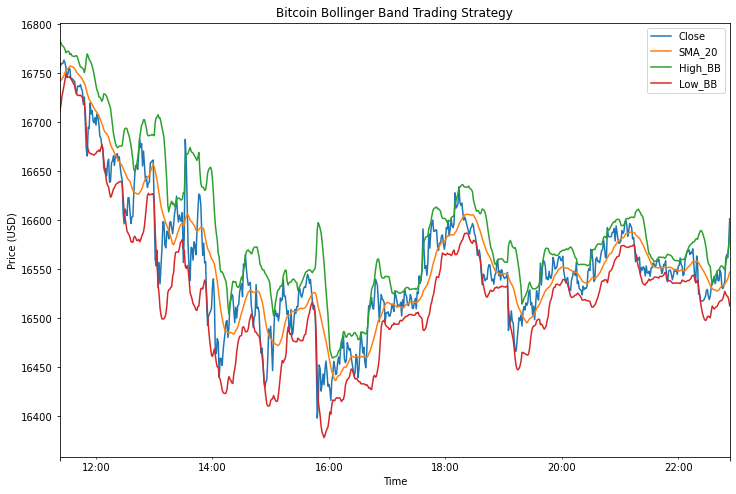

In [13]:
btc.plot(y=['Close','SMA_20','High_BB','Low_BB'], kind='line',figsize=(12,8))
plt.title('Bitcoin Bollinger Band Trading Strategy')
plt.ylabel('Price (USD)')

Text(0, 0.5, 'Price (USD)')

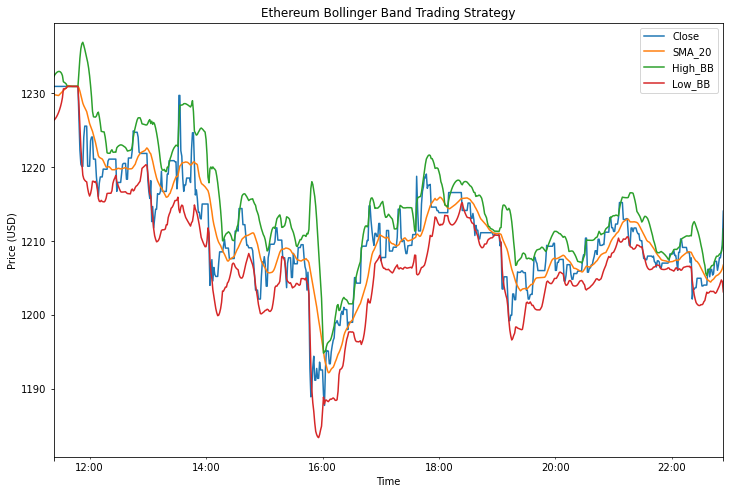

In [14]:
eth.plot(y=['Close','SMA_20','High_BB','Low_BB'], kind='line',figsize=(12,8))
plt.title('Ethereum Bollinger Band Trading Strategy')
plt.ylabel('Price (USD)')

Text(0, 0.5, 'Price (USD)')

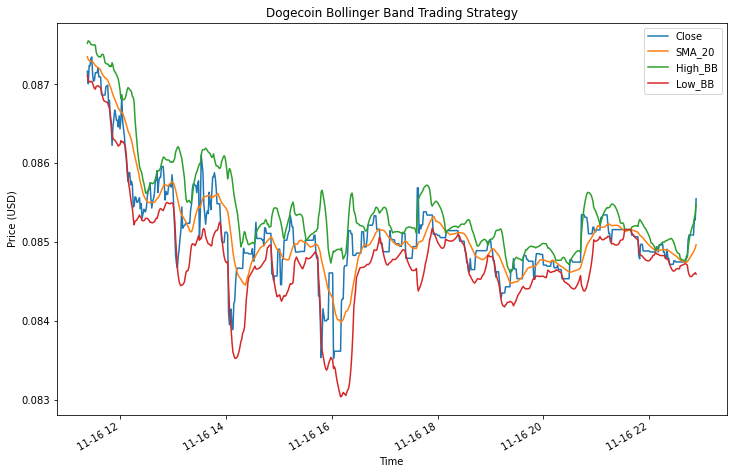

In [15]:
doge.plot(y=['Close','SMA_20','High_BB','Low_BB'], kind='line',figsize=(12,8))
plt.title('Dogecoin Bollinger Band Trading Strategy')
plt.ylabel('Price (USD)')

Text(0, 0.5, 'Price (USD)')

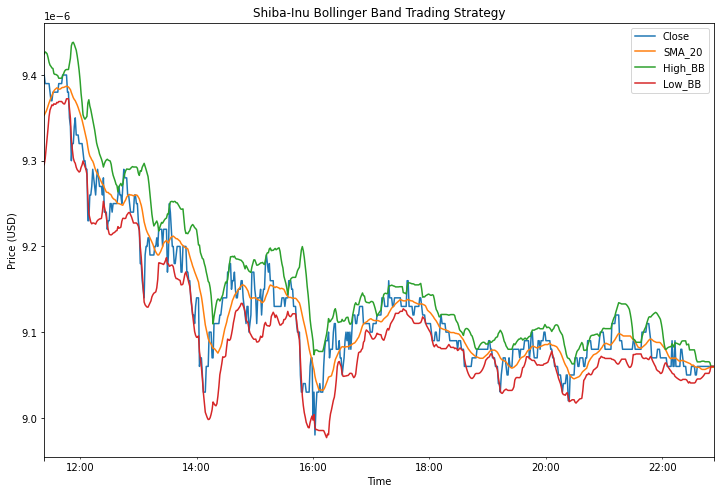

In [16]:
shiba.plot(y=['Close','SMA_20','High_BB','Low_BB'], kind='line',figsize=(12,8))
plt.title('Shiba-Inu Bollinger Band Trading Strategy')
plt.ylabel('Price (USD)')

## Conclusion: 

This is just a proof-of-concept to see if a simple trading strategy with Bollinger Bands volitility indicator and the Stochastic RSI momentum indicator can produce profitable trades. Depending on time interval and price resolution, this strategy seems to preform well. This strategy is far from perfect, but there are lots of opportunities to optimize this strategy. The simple moving average window is a good first place to start. Based on your chosen time interval, the simple moving average needs to be on the same scale. Also, the Bollinger Bands distance from the simple moving average can be tailored. A larger gap between bands may provide a larger window for profitability per trade, but at the cost of less trades, and by extension, less opportunities to profit. Finally, the Stochastic RSI indicator may be fine-tuned to the same time interval and price resolution as the previously mentioned indicators. This indicator is sensititive to fast changes in momentum, unlike other momentum indicators. This is beneficial because it can give you additional insight to make well-informed trades for very-fine prices resolutions (<5 minute). 


In the future, I want to incorporate automatic trading if conditions are met. Having a trading bot follow this strategy is the ultimate goal, but first you have to make sure the strategy isn't a losing one. More testing and optimization is needed before that is possible.